In [1]:
import pandas as pd
import numpy as np
import datetime
#from bokeh.models import HoverTool
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
apa_df = pd.read_csv(r'/home/mayoubi/apatite_export_20191002.csv')

In [3]:
apa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Columns: 186 entries, name to vcs.vcs_name
dtypes: float64(167), object(19)
memory usage: 523.2+ KB


In [4]:
pd.set_option('display.max_columns', len(apa_df.columns))
apa_df.head()

,name,arch.compat.min_py2,arch.compat.min_py3,arch.dep.concurrency,arch.dep.gui_framework,arch.dep.server_framework,arch.pkg.container,arch.pkg.freezer,arch.type,gh.forks,gh.has_wiki,gh.license,gh.open_issues,gh.size,gh.stars,gh.watchers,license.hereditary,license.license,license.license_group,sloc.RATIO.OTHER,sloc.RATIO.autoconf,sloc.RATIO.c,sloc.RATIO.coffeescript,sloc.RATIO.coq,sloc.RATIO.cpp,sloc.RATIO.css,sloc.RATIO.dockerfile,sloc.RATIO.go,sloc.RATIO.haskell,sloc.RATIO.html,sloc.RATIO.java,sloc.RATIO.javascript,sloc.RATIO.jsx,sloc.RATIO.less,sloc.RATIO.lua,sloc.RATIO.markdown,sloc.RATIO.meson,sloc.RATIO.objectivec,sloc.RATIO.python,sloc.RATIO.qml,sloc.RATIO.restructuredtext,sloc.RATIO.rust,sloc.RATIO.sass,sloc.RATIO.sh,sloc.RATIO.sql,sloc.RATIO.systemverilog,sloc.RATIO.tex,sloc.RATIO.typescript,sloc.RATIO.vue,sloc.RATIO.xml,sloc.RATIO.xsl,sloc.RATIO.yaml,sloc.TOTAL_blanks,sloc.TOTAL_code,sloc.TOTAL_comments,sloc.TOTAL_dirs,sloc.TOTAL_files,sloc.TOTAL_lines,sloc.actionscript,sloc.asp,sloc.assembly,sloc.autoconf,sloc.automake,sloc.bash,sloc.batch,sloc.c,sloc.c_code,sloc.c_comments,sloc.c_files,sloc.cabal,sloc.cmake,sloc.coffeescript,sloc.coq,sloc.cpp,sloc.cpp_code,sloc.cpp_comments,sloc.cpp_files,sloc.csharp,sloc.cshell,sloc.css,sloc.d,sloc.dockerfile,sloc.dotnetresource,sloc.elisp,sloc.elixir,sloc.fish,sloc.forth,sloc.fortranlegacy,sloc.fortranmodern,sloc.glsl,sloc.go,sloc.graphql,sloc.groovy,sloc.handlebars,sloc.happy,sloc.haskell,sloc.hcl,sloc.html,sloc.java,sloc.javascript,sloc.jsx,sloc.less,sloc.llvm,sloc.lua,sloc.makefile,sloc.markdown,sloc.meson,sloc.moduledef,sloc.msbuild,sloc.mustache,sloc.nix,sloc.objectivec,sloc.objectivecpp,sloc.org,sloc.pascal,sloc.perl,sloc.php,sloc.prolog,sloc.protobuf,sloc.python,sloc.python_code,sloc.python_comments,sloc.python_files,sloc.qml,sloc.r,sloc.rakefile,sloc.restructuredtext,sloc.rpmspecfile,sloc.ruby,sloc.rubyhtml,sloc.rust,sloc.sass,sloc.scala,sloc.scheme,sloc.scons,sloc.sh,sloc.sql,sloc.srecode,sloc.swift,sloc.swig,sloc.systemverilog,sloc.tcl,sloc.tex,sloc.toml,sloc.typescript,sloc.vala,sloc.vb6,sloc.vimscript,sloc.visualstudioproject,sloc.visualstudiosolution,sloc.vue,sloc.xml,sloc.xsl,sloc.yaml,sloc.zsh,topic.primary,topic.primary_fq,topic.secondary,topic.secondary_fq,vcs.commit_count,vcs.committer_count,vcs.committer_percent_dist.10,vcs.committer_percent_dist.100,vcs.committer_percent_dist.20,vcs.committer_percent_dist.30,vcs.committer_percent_dist.40,vcs.committer_percent_dist.50,vcs.committer_percent_dist.60,vcs.committer_percent_dist.70,vcs.committer_percent_dist.80,vcs.committer_percent_dist.90,vcs.committer_percent_dist.95,vcs.committer_percent_dist.99,vcs.committer_top_5.0,vcs.committer_top_5.1,vcs.committer_top_5.2,vcs.committer_top_5.3,vcs.committer_top_5.4,vcs.first_commit,vcs.latest_commit,vcs.minor_committer_counts.1,vcs.minor_committer_counts.2,vcs.minor_committer_counts.3,vcs.minor_committer_counts.4,vcs.minor_committer_counts.5,vcs.vcs_name
0,archivebox,NaN,3.5,NaN,NaN,NaN,docker,NaN,desktop,306.0,True,MIT License,64.0,3841.0,5450.0,106.0,False,MIT,MIT,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512.0,3458.0,233.0,87.0,156.0,4203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,674.0,NaN,168.0,NaN,NaN,NaN,NaN,NaN,314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2690.0,2031.0,188.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,NaN,NaN,NaN,internet,internet,organization,organization,943.0,43.0,1.0,43.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,34.0,0.9046,0.0085,0.0053,0.0053,0.0053,2017-05-05T08:50:15,2019-10-01T21:05:32,21.0,31.0,34.0,37.0,41.0,git
1,archivematica,2.7,NaN,NaN,NaN,django,NaN,NaN,server,69.0,False,Other,100.0,36631.0,179.0,39.0,True,AGPL,AGPL,0.69,NaN,NaN,NaN,NaN,NaN,N

In [5]:
apa_df.describe()
#spot checking the data

,arch.compat.min_py2,arch.compat.min_py3,gh.forks,gh.open_issues,gh.size,gh.stars,gh.watchers,sloc.RATIO.OTHER,sloc.RATIO.autoconf,sloc.RATIO.c,sloc.RATIO.coffeescript,sloc.RATIO.coq,sloc.RATIO.cpp,sloc.RATIO.css,sloc.RATIO.dockerfile,sloc.RATIO.go,sloc.RATIO.haskell,sloc.RATIO.html,sloc.RATIO.java,sloc.RATIO.javascript,sloc.RATIO.jsx,sloc.RATIO.less,sloc.RATIO.lua,sloc.RATIO.markdown,sloc.RATIO.meson,sloc.RATIO.objectivec,sloc.RATIO.python,sloc.RATIO.qml,sloc.RATIO.restructuredtext,sloc.RATIO.rust,sloc.RATIO.sass,sloc.RATIO.sh,sloc.RATIO.sql,sloc.RATIO.systemverilog,sloc.RATIO.tex,sloc.RATIO.typescript,sloc.RATIO.vue,sloc.RATIO.xml,sloc.RATIO.xsl,sloc.RATIO.yaml,sloc.TOTAL_blanks,sloc.TOTAL_code,sloc.TOTAL_comments,sloc.TOTAL_dirs,sloc.TOTAL_files,sloc.TOTAL_lines,sloc.actionscript,sloc.asp,sloc.assembly,sloc.autoconf,sloc.automake,sloc.bash,sloc.batch,sloc.c,sloc.c_code,sloc.c_comments,sloc.c_files,sloc.cabal,sloc.cmake,sloc.coffeescript,sloc.coq,sloc.cpp,sloc.cpp_code,sloc.cpp_comments,sloc.cpp_files,sloc.csharp,sloc.cshell,sloc.css,sloc.d,sloc.dockerfile,sloc.dotnetresource,sloc.elisp,sloc.elixir,sloc.fish,sloc.forth,sloc.fortranlegacy,sloc.fortranmodern,sloc.glsl,sloc.go,sloc.graphql,sloc.groovy,sloc.handlebars,sloc.happy,sloc.haskell,sloc.hcl,sloc.html,sloc.java,sloc.javascript,sloc.jsx,sloc.less,sloc.llvm,sloc.lua,sloc.makefile,sloc.markdown,sloc.meson,sloc.moduledef,sloc.msbuild,sloc.mustache,sloc.nix,sloc.objectivec,sloc.objectivecpp,sloc.org,sloc.pascal,sloc.perl,sloc.php,sloc.prolog,sloc.protobuf,sloc.python,sloc.python_code,sloc.python_comments,sloc.python_files,sloc.qml,sloc.r,sloc.rakefile,sloc.restructuredtext,sloc.rpmspecfile,sloc.ruby,sloc.rubyhtml,sloc.rust,sloc.sass,sloc.scala,sloc.scheme,sloc.scons,sloc.sh,sloc.sql,sloc.srecode,sloc.swift,sloc.swig,sloc.systemverilog,sloc.tcl,sloc.tex,sloc.toml,sloc.typescript,sloc.vala,sloc.vb6,sloc.vimscript,sloc.visualstudioproject,sloc.visualstudiosolution,sloc.vue,sloc.xml,sloc.xsl,sloc.yaml,sloc.zsh,vcs.commit_count,vcs.committer_count,vcs.committer_percent_dist.10,vcs.committer_percent_dist.100,vcs.committer_percent_dist.20,vcs.committer_percent_dist.30,vcs.committer_percent_dist.40,vcs.committer_percent_dist.50,vcs.committer_percent_dist.60,vcs.committer_percent_dist.70,vcs.committer_percent_dist.80,vcs.committer_percent_dist.90,vcs.committer_percent_dist.95,vcs.committer_percent_dist.99,vcs.committer_top_5.0,vcs.committer_top_5.1,vcs.committer_top_5.2,vcs.committer_top_5.3,vcs.committer_top_5.4,vcs.minor_committer_counts.1,vcs.minor_committer_counts.2,vcs.minor_committer_counts.3,vcs.minor_committer_counts.4,vcs.minor_committer_counts.5
count,143.000000,253.000000,313.000000,313.000000,3.130000e+02,313.000000,313.000000,357.000000,1.00,49.000000,1.00,1.00,22.000000,29.000000,1.00,1.00,1.00,29.000000,2.000000,84.000000,5.000000,5.000000,1.0,20.000000,1.00,1.00,357.000000,1.00,62.000000,1.00,6.000000,5.000000,1.00,1.00,1.00,7.000000,2.000000,11.000000,1.0,5.000000,357.000000,3.570000e+02,357.000000,357.000000,357.000000,3.570000e+02,2.000000,1.0,5.000000,69.000000,12.000000,31.000000,84.000000,80.000000,80.000000,72.000000,72.000000,1.0,6.00000,5.000000,1.0,41.000000,41.000000,40.000000,40.000000,6.000000,1.0,187.000000,5.000000,49.000000,2.000000,4.000000,2.000000,5.000000,1.0,4.000000,4.000000,2.000000,6.000000,2.000000,1.0,1.0,5.000000,1.0,3.000000,205.000000,13.000000,1.720000e+02,11.000000,39.000000,1.0,3.000000,186.000000,249.000000,4.000000,6.000000,3.000000,4.000000,1.0,12.000000,4.000000,3.000000,2.000000,17.000000,7.000000,4.000000,8.000000,3.570000e+02,3.570000e+02,357.000000,357.000000,3.000000,2.000000,1.0,213.000000,42.000000,5.000000,1.0,2.000000,43.000000,2.0000,1.0,3.000000,190.000000,30.000000,1.0,2.000000,4.000000,2.000000,2.00000,13.000000,13.000000,19.000000,2.000000,3.000000,3.000000,6.000000,3.000000,6.000000,1.140000e+02,19.000000,131.000000,4.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.00

In [6]:
#csv_df=apa_df.describe()

#from IPython.display import FileLink, FileLinks
#SAVE_PATH = './saved_data'
#from boltons.fileutils import mkdir_p
#mkdir_p(SAVE_PATH)

#csv_df.to_csv(SAVE_PATH + '/summary.csv', index=False)
# csv_df.to_excel('/path/to/data.xlsx', index=False)

#FileLinks(SAVE_PATH)

In [7]:
apa_df.columns = apa_df.columns.str.lower().str.replace('.', '_')

In [8]:
apa_df[['arch_compat_min_py2', 'arch_compat_min_py3']]

,arch_compat_min_py2,arch_compat_min_py3
0,NaN,3.5
1,2.7,NaN
2,2.7,3.1
3,2.7,NaN
4,NaN,3.6
...,...,...
355,NaN,3.5
356,2.7,NaN
357,2.6,NaN
358,2.3,NaN


In [9]:
def py23_compat(py2, py3):
    if not pd.isnull(py2) and not pd.isnull(py3):
        return 'py23'
    if pd.isnull(py2):
        return 'py3'
    return 'py2'

apa_df['py23_compat'] = apa_df[['arch_compat_min_py2','arch_compat_min_py3']].apply(lambda x: py23_compat(*x), axis=1)

In [10]:
apa_df['vcs_first_commit']  = pd.to_datetime(apa_df['vcs_first_commit'])
apa_df['vcs_first_commit'] = pd.to_datetime(apa_df['vcs_first_commit']).dt.date
apa_df['vcs_latest_commit']  = pd.to_datetime(apa_df['vcs_latest_commit'])
apa_df['vcs_latest_commit'] = pd.to_datetime(apa_df['vcs_latest_commit']).dt.date

apa_df['age_commit'] =   pd.to_datetime(apa_df.vcs_latest_commit)-pd.to_datetime(apa_df.vcs_first_commit)
apa_df['age_commit'] / pd.Timedelta(1, unit='d')
apa_df['age_commit'].astype('timedelta64[D]')

0       879.0
1      2532.0
2      3058.0
3      4592.0
4       593.0
        ...  
355    4103.0
356    2363.0
357    4524.0
358       NaN
359       NaN
Name: age_commit, Length: 360, dtype: float64

In [11]:
apa_df['age_commit'] = pd.to_numeric(apa_df['age_commit'].dt.days, downcast='integer')

In [12]:
age_df = apa_df.dropna(subset=['age_commit'])
age_df['age_commit'].sum()

1013908.0

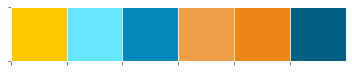

In [13]:
_email = '''
light orange: #FFC800
med turq: #66e5ff
blue: #0588BA
dark orange: #ED9E46
dark rich orange: #eb8717
dark blue: #046083
'''
# bgcolor / medium blue: #45AFDC
# medium-dark blue: #1D98C7

def _parse_colors(text):
    return [x.split(':')[-1].strip() for x in text.splitlines() if x.strip()]

COLORS = _parse_colors(_email)
PALETTE = sns.color_palette(COLORS)
sns.palplot(PALETTE)

_alt_colors = '''
dark orange: #ED9E46
blue: #0588BA
light orange: #FFC800
med turq: #66e5ff
dark rich orange: #eb8717
dark blue: #046083
'''
ALT_COLORS = _parse_colors(_alt_colors)

def m_swarmplot(*a, **kw):
    kw.setdefault('palette', PALETTE)
    kw.setdefault('size', 14)
    ret = sns.swarmplot(*a, **kw)
    ret.set_facecolor('#00000000')
    ret.set_facecolor('#45AFDC00')
    return ret

def m_pieplot(df, *a, **kw):
    kw.setdefault('y', 'name')
    kw.setdefault('counterclock', True)
    kw.setdefault('legend', False)
    kw.setdefault('autopct', '%1.0f%%')
    kw.setdefault('pctdistance', 1.1)
    kw.setdefault('labeldistance', 1.25)
    kw.setdefault('radius', 1.2)
    kw.setdefault('figsize', (8, 8))
    kw.setdefault('colors', ALT_COLORS[::-1])
    kw.setdefault('textprops', {}).setdefault('fontsize', 20)
    pie = df.plot.pie(*a, **kw)
    return pie

In [14]:
apa_df.head()

,name,arch_compat_min_py2,arch_compat_min_py3,arch_dep_concurrency,arch_dep_gui_framework,arch_dep_server_framework,arch_pkg_container,arch_pkg_freezer,arch_type,gh_forks,gh_has_wiki,gh_license,gh_open_issues,gh_size,gh_stars,gh_watchers,license_hereditary,license_license,license_license_group,sloc_ratio_other,sloc_ratio_autoconf,sloc_ratio_c,sloc_ratio_coffeescript,sloc_ratio_coq,sloc_ratio_cpp,sloc_ratio_css,sloc_ratio_dockerfile,sloc_ratio_go,sloc_ratio_haskell,sloc_ratio_html,sloc_ratio_java,sloc_ratio_javascript,sloc_ratio_jsx,sloc_ratio_less,sloc_ratio_lua,sloc_ratio_markdown,sloc_ratio_meson,sloc_ratio_objectivec,sloc_ratio_python,sloc_ratio_qml,sloc_ratio_restructuredtext,sloc_ratio_rust,sloc_ratio_sass,sloc_ratio_sh,sloc_ratio_sql,sloc_ratio_systemverilog,sloc_ratio_tex,sloc_ratio_typescript,sloc_ratio_vue,sloc_ratio_xml,sloc_ratio_xsl,sloc_ratio_yaml,sloc_total_blanks,sloc_total_code,sloc_total_comments,sloc_total_dirs,sloc_total_files,sloc_total_lines,sloc_actionscript,sloc_asp,sloc_assembly,sloc_autoconf,sloc_automake,sloc_bash,sloc_batch,sloc_c,sloc_c_code,sloc_c_comments,sloc_c_files,sloc_cabal,sloc_cmake,sloc_coffeescript,sloc_coq,sloc_cpp,sloc_cpp_code,sloc_cpp_comments,sloc_cpp_files,sloc_csharp,sloc_cshell,sloc_css,sloc_d,sloc_dockerfile,sloc_dotnetresource,sloc_elisp,sloc_elixir,sloc_fish,sloc_forth,sloc_fortranlegacy,sloc_fortranmodern,sloc_glsl,sloc_go,sloc_graphql,sloc_groovy,...,sloc_haskell,sloc_hcl,sloc_html,sloc_java,sloc_javascript,sloc_jsx,sloc_less,sloc_llvm,sloc_lua,sloc_makefile,sloc_markdown,sloc_meson,sloc_moduledef,sloc_msbuild,sloc_mustache,sloc_nix,sloc_objectivec,sloc_objectivecpp,sloc_org,sloc_pascal,sloc_perl,sloc_php,sloc_prolog,sloc_protobuf,sloc_python,sloc_python_code,sloc_python_comments,sloc_python_files,sloc_qml,sloc_r,sloc_rakefile,sloc_restructuredtext,sloc_rpmspecfile,sloc_ruby,sloc_rubyhtml,sloc_rust,sloc_sass,sloc_scala,sloc_scheme,sloc_scons,sloc_sh,sloc_sql,sloc_srecode,sloc_swift,sloc_swig,sloc_systemverilog,sloc_tcl,sloc_tex,sloc_toml,sloc_typescript,sloc_vala,sloc_vb6,sloc_vimscript,sloc_visualstudioproject,sloc_visualstudiosolution,sloc_vue,sloc_xml,sloc_xsl,sloc_yaml,sloc_zsh,topic_primary,topic_primary_fq,topic_secondary,topic_secondary_fq,vcs_commit_count,vcs_committer_count,vcs_committer_percent_dist_10,vcs_committer_percent_dist_100,vcs_committer_percent_dist_20,vcs_committer_percent_dist_30,vcs_committer_percent_dist_40,vcs_committer_percent_dist_50,vcs_committer_percent_dist_60,vcs_committer_percent_dist_70,vcs_committer_percent_dist_80,vcs_committer_percent_dist_90,vcs_committer_percent_dist_95,vcs_committer_percent_dist_99,vcs_committer_top_5_0,vcs_committer_top_5_1,vcs_committer_top_5_2,vcs_committer_top_5_3,vcs_committer_top_5_4,vcs_first_commit,vcs_latest_commit,vcs_minor_committer_counts_1,vcs_minor_committer_counts_2,vcs_minor_committer_counts_3,vcs_minor_committer_counts_4,vcs_minor_committer_counts_5,vcs_vcs_name,py23_compat,age_commit
0,archivebox,NaN,3.5,NaN,NaN,NaN,docker,NaN,desktop,306.0,True,MIT License,64.0,3841.0,5450.0,106.0,False,MIT,MIT,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512.0,3458.0,233.0,87.0,156.0,4203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,674.0,NaN,168.0,NaN,NaN,NaN,NaN,NaN,314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2690.0,2031.0,188.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,NaN,NaN,NaN,internet,internet,organization,organization,943.0,43.0,1.0,43.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,34.0,0.9046,0.0085,0.0053,0.0053,0.0053,2017-05-05,2019-10-01,21.0,31.0,34.0,37.0,41.0,git,py3,879.0
1,archivematica,2.7,NaN,NaN,NaN,django,NaN,NaN,server,69.0,False,Other,100.0,36631.0,179.0,39.0,True,AGPL,AGPL,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [15]:
def committer_50(x):
    if x < 2.0:
        return "Yes"
    return "No"

apa_df['vcs_committer_percent_dist_50'] = apa_df['vcs_committer_percent_dist_50'].apply(committer_50)

Text(0, 0.5, '')

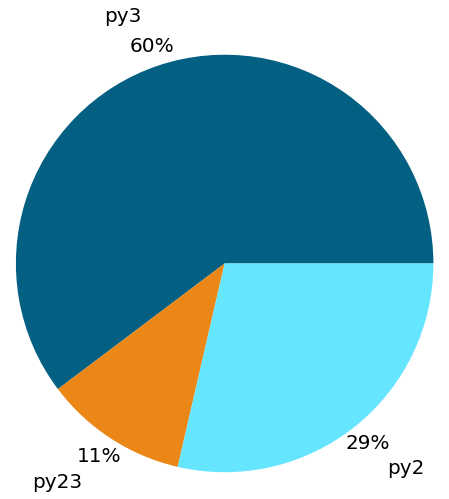

In [16]:
pie = m_pieplot(
    apa_df
    .groupby('py23_compat')
    .count()
    .sort_values('py23_compat', ascending=False))

#plt.title("Python Compatibility", weight='bold', pad = 40, size=20)
plt.ylabel("")

Text(0, 0.5, 'Compatibility')

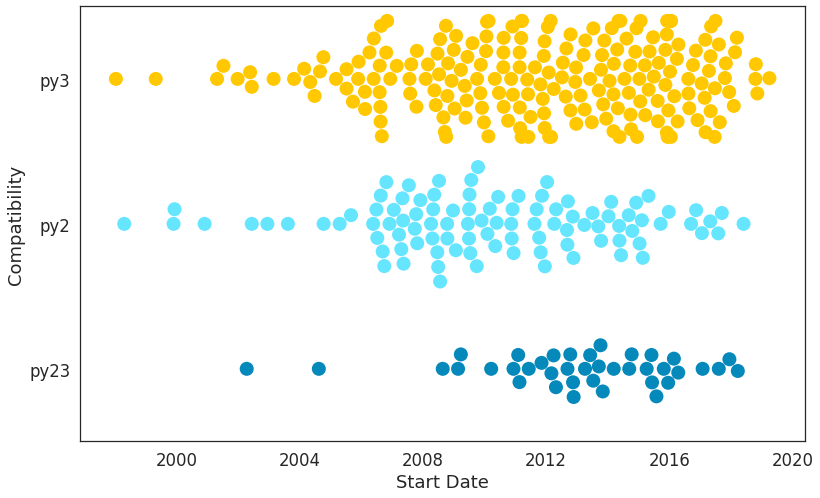

In [17]:
apa_df['vcs_first_commit'] =  pd.to_datetime(apa_df['vcs_first_commit'])
pytime_df = apa_df.dropna(subset=['vcs_first_commit'])

fig = plt.figure(figsize = (13, 8))
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="vcs_first_commit", y="py23_compat", data=pytime_df)
plt.xlabel("Start Date")
plt.ylabel("Compatibility")
#plt.title("Start Date / Python Compatibility", weight='bold', size=20))

In [18]:
def py_3_compat(x):
    if x >= 3.0:
        return 'True'
    return 'False'

apa_df['py3_compat'] = apa_df['arch_compat_min_py3'].apply(py_3_compat)

[Text(0, 0, 'py 2'), Text(0, 0, 'py 3')]

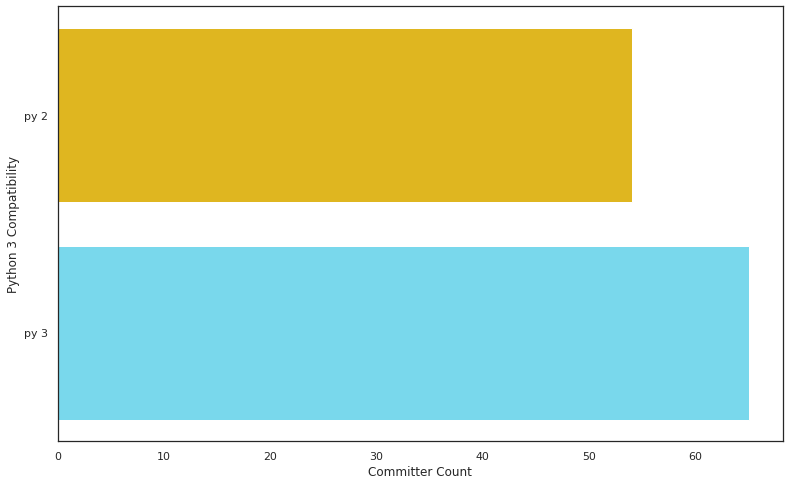

In [19]:
fig = plt.figure(figsize = (13, 8))
sns.set(font_scale = 1.5)
sns.set(style="white")
result = apa_df.groupby(["py3_compat"])['vcs_committer_count'].aggregate(np.median).reset_index().sort_values('vcs_committer_count')
ax = sns.barplot(x='vcs_committer_count', y="py3_compat", data=result, ci=None, palette=PALETTE)
plt.xlabel("Committer Count")
plt.ylabel("Python 3 Compatibility")
#plt.title("Figure 14: Average GitHub Stars / Primary Topics", weight = 'bold')
ax.set_yticklabels(('py 2', 'py 3'))

#fig.set_facecolor('#45AFDC00')
#ax.set_facecolor('#00000000')

[Text(0, 0, 'py 3'), Text(0, 0, 'py 2')]

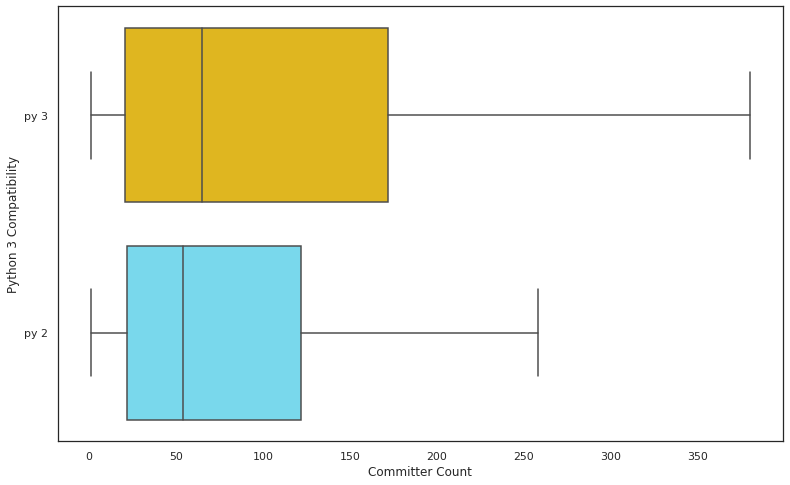

In [20]:
fig = plt.figure(figsize = (13, 8))
sns.set(font_scale = 1.5)
sns.set(style="white")
ax = sns.boxplot(x='vcs_committer_count', y="py3_compat",data=apa_df, palette=PALETTE, showfliers=False)
plt.xlabel("Committer Count")
plt.ylabel("Python 3 Compatibility")
ax.set_yticklabels(('py 3', 'py 2'))

Text(0, 0.5, 'Hereditary License')

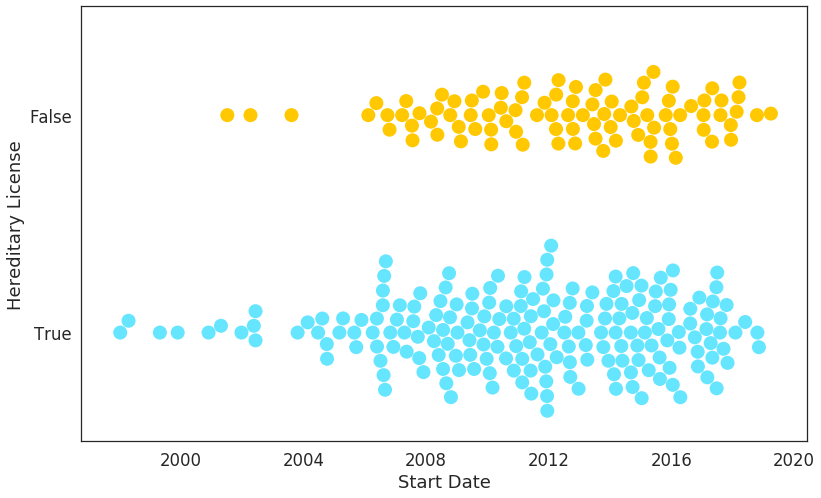

In [21]:
timelicense_df = apa_df.dropna(subset=['license_hereditary'])
timelicense_df = timelicense_df.dropna(subset=['vcs_first_commit'])
timelicense_df['license_hereditary'] = timelicense_df['license_hereditary'].astype(str)

fig = plt.figure(figsize = (13, 8))
#plt.yticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="vcs_first_commit", y="license_hereditary", data=timelicense_df)
plt.xlabel("Start Date")
plt.ylabel("Hereditary License")
#plt.title("Start Date / Hereditary License", weight='bold')

Text(0, 0.5, 'License Group')

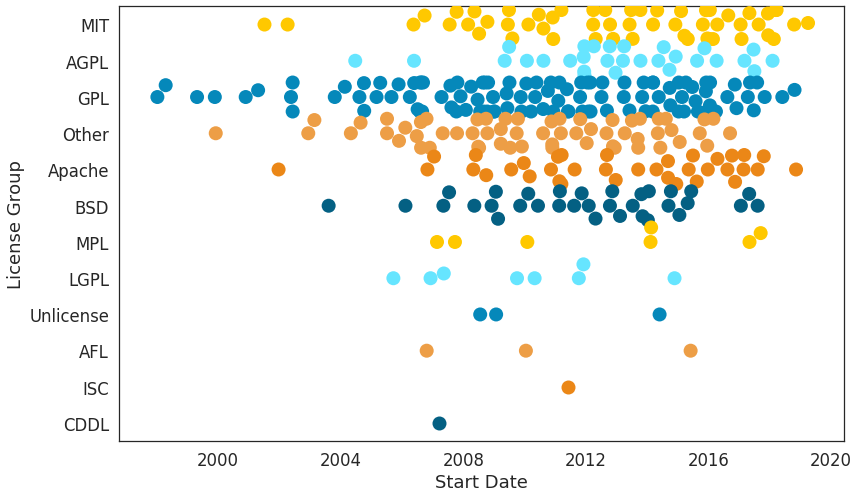

In [22]:
licensetime_df = apa_df.dropna(subset=['license_license_group'])
licensetime_df = licensetime_df.dropna(subset=['vcs_first_commit'])
licensetime_df['license_license_group'] = licensetime_df['license_license_group'].astype(str)

fig = plt.figure(figsize = (13, 8))
#plt.yticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="vcs_first_commit", y="license_license_group", data=licensetime_df)
plt.xlabel("Start Date")
plt.ylabel("License Group")
#plt.title("Start Date / License Group", weight='bold')

In [23]:
common_license_df = licensetime_df.loc[~licensetime_df['license_license_group'].isin(['Unlicense', 'AFL', 'ISC', 'CDDL'])]

Text(0, 0.5, 'License Group')

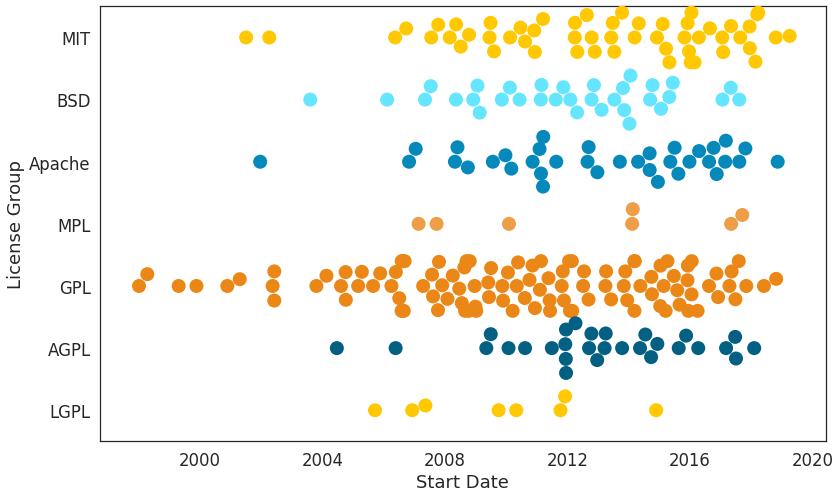

In [24]:
fig = plt.figure(figsize = (13, 8))
#plt.yticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="vcs_first_commit", y="license_license_group", data=common_license_df, order=['MIT', 'BSD', 'Apache', 'MPL', 'GPL', 'AGPL', 'LGPL'])
plt.xlabel("Start Date")
plt.ylabel("License Group")
#plt.title("Start Date / License Group", weight='bold')

In [25]:
#countlicense_df = apa_df.dropna(subset=['license_hereditary'])
#countlicense_df['license_hereditary'] = countlicense_df['license_hereditary'].astype(str)

#fig = plt.figure(figsize = (13, 8))
#sns.set(font_scale = 1.5)
#sns.set(style="white")
#ax = sns.boxplot(x='vcs_committer_count', y='license_hereditary',data=countlicense_df, 
#                 palette=PALETTE, showfliers=False)
#plt.xlabel('Committer Count')
#plt.ylabel('Hereditary Licenses')

In [26]:
apa_df.dtypes[['topic_primary_fq']]

topic_primary_fq    object
dtype: object

In [27]:
license_df = apa_df.dropna(subset=['topic_primary_fq'])

In [28]:
def is_topic_dev(x):
    return x.startswith('dev')

license_df['is_dev'] = license_df['topic_primary_fq'].apply(is_topic_dev)

/home/mayoubi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
license_df.head()

,name,arch_compat_min_py2,arch_compat_min_py3,arch_dep_concurrency,arch_dep_gui_framework,arch_dep_server_framework,arch_pkg_container,arch_pkg_freezer,arch_type,gh_forks,gh_has_wiki,gh_license,gh_open_issues,gh_size,gh_stars,gh_watchers,license_hereditary,license_license,license_license_group,sloc_ratio_other,sloc_ratio_autoconf,sloc_ratio_c,sloc_ratio_coffeescript,sloc_ratio_coq,sloc_ratio_cpp,sloc_ratio_css,sloc_ratio_dockerfile,sloc_ratio_go,sloc_ratio_haskell,sloc_ratio_html,sloc_ratio_java,sloc_ratio_javascript,sloc_ratio_jsx,sloc_ratio_less,sloc_ratio_lua,sloc_ratio_markdown,sloc_ratio_meson,sloc_ratio_objectivec,sloc_ratio_python,sloc_ratio_qml,sloc_ratio_restructuredtext,sloc_ratio_rust,sloc_ratio_sass,sloc_ratio_sh,sloc_ratio_sql,sloc_ratio_systemverilog,sloc_ratio_tex,sloc_ratio_typescript,sloc_ratio_vue,sloc_ratio_xml,sloc_ratio_xsl,sloc_ratio_yaml,sloc_total_blanks,sloc_total_code,sloc_total_comments,sloc_total_dirs,sloc_total_files,sloc_total_lines,sloc_actionscript,sloc_asp,sloc_assembly,sloc_autoconf,sloc_automake,sloc_bash,sloc_batch,sloc_c,sloc_c_code,sloc_c_comments,sloc_c_files,sloc_cabal,sloc_cmake,sloc_coffeescript,sloc_coq,sloc_cpp,sloc_cpp_code,sloc_cpp_comments,sloc_cpp_files,sloc_csharp,sloc_cshell,sloc_css,sloc_d,sloc_dockerfile,sloc_dotnetresource,sloc_elisp,sloc_elixir,sloc_fish,sloc_forth,sloc_fortranlegacy,sloc_fortranmodern,sloc_glsl,sloc_go,sloc_graphql,sloc_groovy,...,sloc_html,sloc_java,sloc_javascript,sloc_jsx,sloc_less,sloc_llvm,sloc_lua,sloc_makefile,sloc_markdown,sloc_meson,sloc_moduledef,sloc_msbuild,sloc_mustache,sloc_nix,sloc_objectivec,sloc_objectivecpp,sloc_org,sloc_pascal,sloc_perl,sloc_php,sloc_prolog,sloc_protobuf,sloc_python,sloc_python_code,sloc_python_comments,sloc_python_files,sloc_qml,sloc_r,sloc_rakefile,sloc_restructuredtext,sloc_rpmspecfile,sloc_ruby,sloc_rubyhtml,sloc_rust,sloc_sass,sloc_scala,sloc_scheme,sloc_scons,sloc_sh,sloc_sql,sloc_srecode,sloc_swift,sloc_swig,sloc_systemverilog,sloc_tcl,sloc_tex,sloc_toml,sloc_typescript,sloc_vala,sloc_vb6,sloc_vimscript,sloc_visualstudioproject,sloc_visualstudiosolution,sloc_vue,sloc_xml,sloc_xsl,sloc_yaml,sloc_zsh,topic_primary,topic_primary_fq,topic_secondary,topic_secondary_fq,vcs_commit_count,vcs_committer_count,vcs_committer_percent_dist_10,vcs_committer_percent_dist_100,vcs_committer_percent_dist_20,vcs_committer_percent_dist_30,vcs_committer_percent_dist_40,vcs_committer_percent_dist_50,vcs_committer_percent_dist_60,vcs_committer_percent_dist_70,vcs_committer_percent_dist_80,vcs_committer_percent_dist_90,vcs_committer_percent_dist_95,vcs_committer_percent_dist_99,vcs_committer_top_5_0,vcs_committer_top_5_1,vcs_committer_top_5_2,vcs_committer_top_5_3,vcs_committer_top_5_4,vcs_first_commit,vcs_latest_commit,vcs_minor_committer_counts_1,vcs_minor_committer_counts_2,vcs_minor_committer_counts_3,vcs_minor_committer_counts_4,vcs_minor_committer_counts_5,vcs_vcs_name,py23_compat,age_commit,py3_compat,is_dev
0,archivebox,NaN,3.5,NaN,NaN,NaN,docker,NaN,desktop,306.0,True,MIT License,64.0,3841.0,5450.0,106.0,False,MIT,MIT,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512.0,3458.0,233.0,87.0,156.0,4203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,674.0,NaN,168.0,NaN,NaN,NaN,NaN,NaN,314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2690.0,2031.0,188.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,NaN,NaN,NaN,internet,internet,organization,organization,943.0,43.0,1.0,43.0,1.0,1.0,1.0,Yes,1.0,1.0,1.0,1.0,10.0,34.0,0.9046,0.0085,0.0053,0.0053,0.0053,2017-05-05,2019-10-01,21.0,31.0,34.0,37.0,41.0,git,py3,879.0,True,False
1,archivematica,2.7,NaN,NaN,NaN,django,NaN,NaN,server,69.0,False,Other,100.0,36631.0,179.0,39.0,True,AGPL,AGPL,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Text(0, 0.5, '')

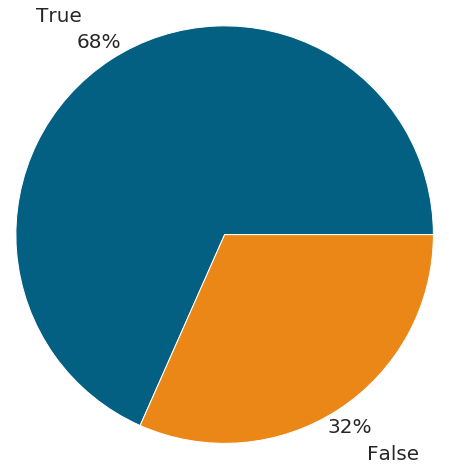

In [30]:
pie = m_pieplot(
    license_df
    .groupby('license_hereditary')
    .count()
    .sort_values('license_hereditary', ascending=False))

#plt.title("License Hereditary Breakdown", weight='bold', pad=40, size=20)
plt.ylabel("")

Text(0, 0.5, '')

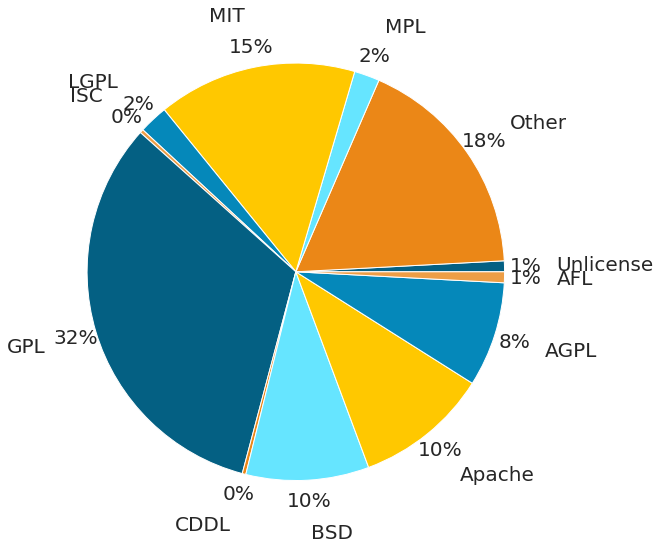

In [31]:
pie = m_pieplot(
    license_df
    .groupby('license_license_group')
    .count()
    .sort_values('license_license_group', ascending=False))

#plt.title("License Group Breakdown", weight='bold', pad=40, size=20)
plt.ylabel("")

In [32]:
apa_df.head()

,name,arch_compat_min_py2,arch_compat_min_py3,arch_dep_concurrency,arch_dep_gui_framework,arch_dep_server_framework,arch_pkg_container,arch_pkg_freezer,arch_type,gh_forks,gh_has_wiki,gh_license,gh_open_issues,gh_size,gh_stars,gh_watchers,license_hereditary,license_license,license_license_group,sloc_ratio_other,sloc_ratio_autoconf,sloc_ratio_c,sloc_ratio_coffeescript,sloc_ratio_coq,sloc_ratio_cpp,sloc_ratio_css,sloc_ratio_dockerfile,sloc_ratio_go,sloc_ratio_haskell,sloc_ratio_html,sloc_ratio_java,sloc_ratio_javascript,sloc_ratio_jsx,sloc_ratio_less,sloc_ratio_lua,sloc_ratio_markdown,sloc_ratio_meson,sloc_ratio_objectivec,sloc_ratio_python,sloc_ratio_qml,sloc_ratio_restructuredtext,sloc_ratio_rust,sloc_ratio_sass,sloc_ratio_sh,sloc_ratio_sql,sloc_ratio_systemverilog,sloc_ratio_tex,sloc_ratio_typescript,sloc_ratio_vue,sloc_ratio_xml,sloc_ratio_xsl,sloc_ratio_yaml,sloc_total_blanks,sloc_total_code,sloc_total_comments,sloc_total_dirs,sloc_total_files,sloc_total_lines,sloc_actionscript,sloc_asp,sloc_assembly,sloc_autoconf,sloc_automake,sloc_bash,sloc_batch,sloc_c,sloc_c_code,sloc_c_comments,sloc_c_files,sloc_cabal,sloc_cmake,sloc_coffeescript,sloc_coq,sloc_cpp,sloc_cpp_code,sloc_cpp_comments,sloc_cpp_files,sloc_csharp,sloc_cshell,sloc_css,sloc_d,sloc_dockerfile,sloc_dotnetresource,sloc_elisp,sloc_elixir,sloc_fish,sloc_forth,sloc_fortranlegacy,sloc_fortranmodern,sloc_glsl,sloc_go,sloc_graphql,sloc_groovy,...,sloc_hcl,sloc_html,sloc_java,sloc_javascript,sloc_jsx,sloc_less,sloc_llvm,sloc_lua,sloc_makefile,sloc_markdown,sloc_meson,sloc_moduledef,sloc_msbuild,sloc_mustache,sloc_nix,sloc_objectivec,sloc_objectivecpp,sloc_org,sloc_pascal,sloc_perl,sloc_php,sloc_prolog,sloc_protobuf,sloc_python,sloc_python_code,sloc_python_comments,sloc_python_files,sloc_qml,sloc_r,sloc_rakefile,sloc_restructuredtext,sloc_rpmspecfile,sloc_ruby,sloc_rubyhtml,sloc_rust,sloc_sass,sloc_scala,sloc_scheme,sloc_scons,sloc_sh,sloc_sql,sloc_srecode,sloc_swift,sloc_swig,sloc_systemverilog,sloc_tcl,sloc_tex,sloc_toml,sloc_typescript,sloc_vala,sloc_vb6,sloc_vimscript,sloc_visualstudioproject,sloc_visualstudiosolution,sloc_vue,sloc_xml,sloc_xsl,sloc_yaml,sloc_zsh,topic_primary,topic_primary_fq,topic_secondary,topic_secondary_fq,vcs_commit_count,vcs_committer_count,vcs_committer_percent_dist_10,vcs_committer_percent_dist_100,vcs_committer_percent_dist_20,vcs_committer_percent_dist_30,vcs_committer_percent_dist_40,vcs_committer_percent_dist_50,vcs_committer_percent_dist_60,vcs_committer_percent_dist_70,vcs_committer_percent_dist_80,vcs_committer_percent_dist_90,vcs_committer_percent_dist_95,vcs_committer_percent_dist_99,vcs_committer_top_5_0,vcs_committer_top_5_1,vcs_committer_top_5_2,vcs_committer_top_5_3,vcs_committer_top_5_4,vcs_first_commit,vcs_latest_commit,vcs_minor_committer_counts_1,vcs_minor_committer_counts_2,vcs_minor_committer_counts_3,vcs_minor_committer_counts_4,vcs_minor_committer_counts_5,vcs_vcs_name,py23_compat,age_commit,py3_compat
0,archivebox,NaN,3.5,NaN,NaN,NaN,docker,NaN,desktop,306.0,True,MIT License,64.0,3841.0,5450.0,106.0,False,MIT,MIT,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512.0,3458.0,233.0,87.0,156.0,4203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,674.0,NaN,168.0,NaN,NaN,NaN,NaN,NaN,314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2690.0,2031.0,188.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,NaN,NaN,NaN,internet,internet,organization,organization,943.0,43.0,1.0,43.0,1.0,1.0,1.0,Yes,1.0,1.0,1.0,1.0,10.0,34.0,0.9046,0.0085,0.0053,0.0053,0.0053,2017-05-05,2019-10-01,21.0,31.0,34.0,37.0,41.0,git,py3,879.0,True
1,archivematica,2.7,NaN,NaN,NaN,django,NaN,NaN,server,69.0,False,Other,100.0,36631.0,179.0,39.0,True,AGPL,AGPL,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Text(0, 0.5, '')

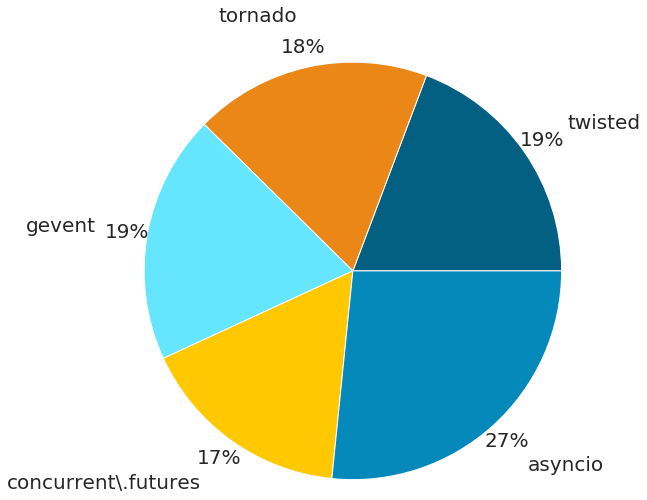

In [33]:
pie = m_pieplot(
    apa_df
    .groupby('arch_dep_concurrency')
    .count()
    .sort_values('arch_dep_concurrency', ascending=False))
#plt.title("Dep Concurrency Breakdown", weight='bold', pad = 40, size=20)
plt.ylabel("")

Text(0, 0.5, 'Concurrency')

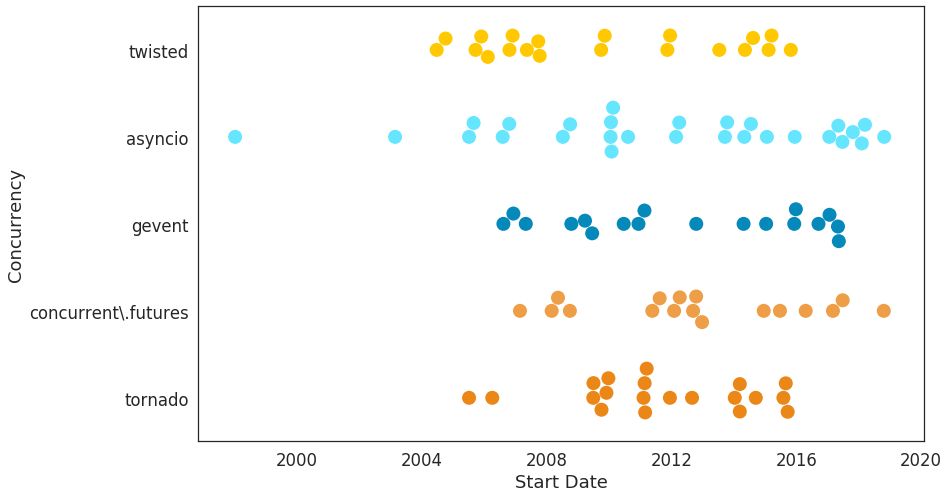

In [34]:
concurrency_df = apa_df.dropna(subset=['arch_dep_concurrency'])
concurrency_df = concurrency_df.dropna(subset=['vcs_first_commit'])

fig = plt.figure(figsize = (13, 8))
#plt.yticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="vcs_first_commit", y="arch_dep_concurrency", data=concurrency_df)

plt.xlabel("Start Date")
plt.ylabel("Concurrency")
#plt.title("Start Date / Concurrency", weight='bold')

Text(0, 0.5, '')

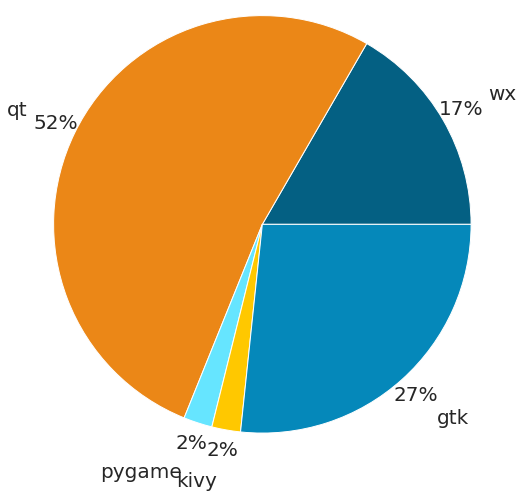

In [35]:
pie = m_pieplot(
    apa_df
    .groupby('arch_dep_gui_framework')
    .count()
    .sort_values('arch_dep_gui_framework', ascending=False))
#plt.title("Dep GUI Framework Breakdown", weight='bold', pad = 40, size=20)
plt.ylabel("")

In [36]:
apa_df[['arch_dep_gui_framework']]

,arch_dep_gui_framework
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
355,qt
356,NaN
357,wx
358,gtk


Text(0, 0.5, 'GUI Framework')

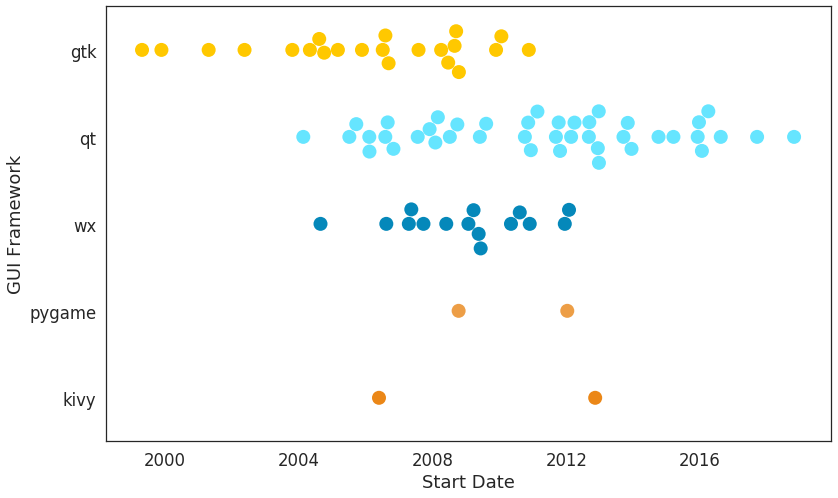

In [37]:
guiframework_df = apa_df.dropna(subset=['arch_dep_gui_framework'])
guiframework_df = guiframework_df.dropna(subset=['vcs_first_commit'])

fig = plt.figure(figsize = (13, 8))
#plt.yticks(rotation=90)
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="vcs_first_commit", y="arch_dep_gui_framework", data=guiframework_df)
plt.xlabel("Start Date")
plt.ylabel("GUI Framework")
#plt.title("Start Date / GUI Framework", weight='bold')

Text(0, 0.5, '')

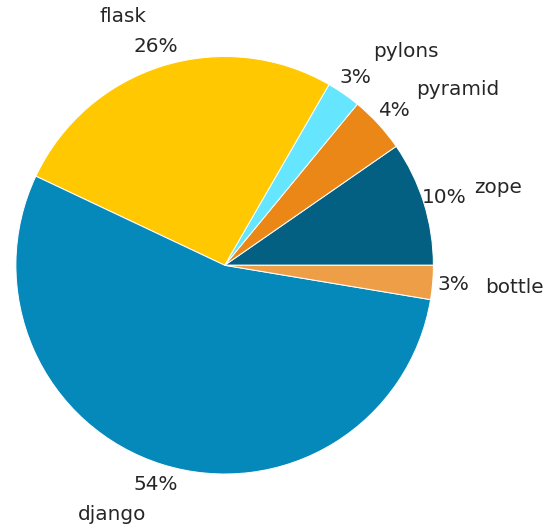

In [38]:
pie = m_pieplot(
    apa_df
    .groupby('arch_dep_server_framework')
    .count()
    .sort_values('arch_dep_server_framework', ascending=False))
#plt.title("Dep Server Framework Breakdown", weight='bold', pad = 50, size=20)
plt.ylabel("")

Text(0, 0.5, 'Server Framework')

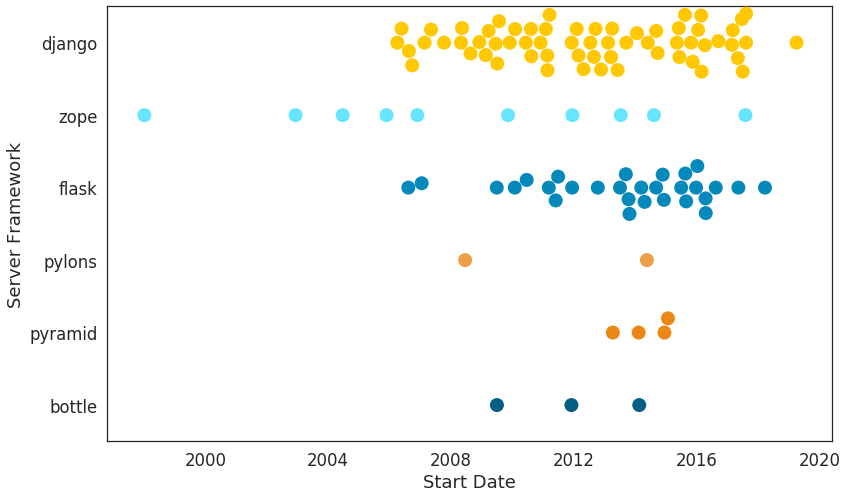

In [39]:
serverframework_df = apa_df.dropna(subset=['arch_dep_server_framework'])
serverframework_df = serverframework_df.dropna(subset=['vcs_first_commit'])

fig = plt.figure(figsize = (13, 8))
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="vcs_first_commit", y="arch_dep_server_framework", data=serverframework_df)
plt.xlabel("Start Date")
plt.ylabel("Server Framework")
#plt.title("Start Date / Server Framework", weight='bold')

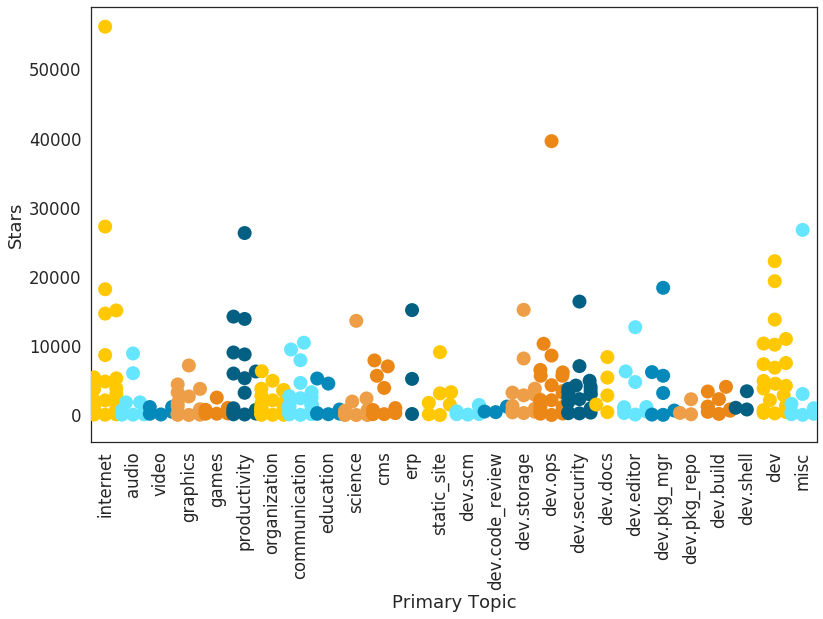

In [40]:
fig = plt.figure(figsize = (13, 8))
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="topic_primary_fq", y="gh_stars", data=apa_df)
plt.xlabel("Primary Topic")
plt.ylabel("Stars")
#plt.title("GitHub Stars / Primary Topic", weight='bold')

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')

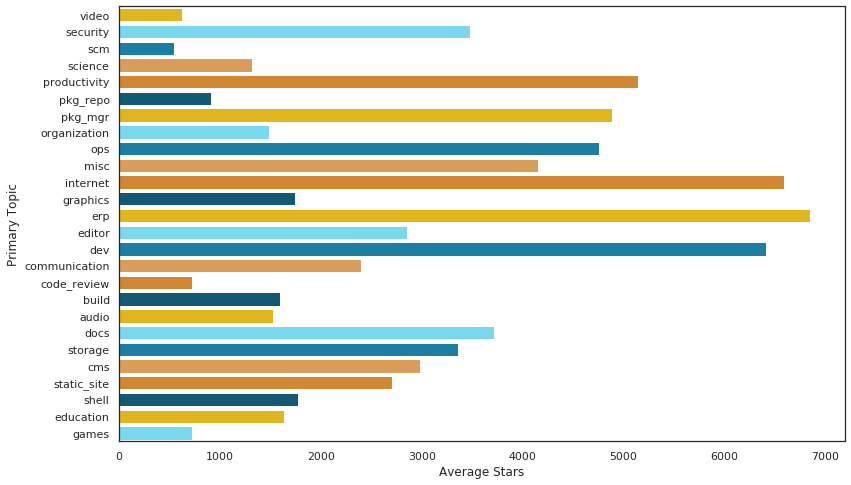

In [41]:
fig = plt.figure(figsize = (13, 8))
sns.set(font_scale = 1.5)
sns.set(style="white")
result = apa_df.groupby(["topic_primary"])['gh_stars'].aggregate(np.average).reset_index().sort_values('gh_stars')
ax = sns.barplot(x='gh_stars', y="topic_primary", data=apa_df, ci=None, 
                 order=result['topic_primary'][::-1], palette=PALETTE)
plt.xlabel("Average Stars")
plt.ylabel("Primary Topic")
#plt.title("Average GitHub Stars / Primary Topics", weight = 'bold')

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')

In [42]:
stars_df = apa_df.dropna(subset=['topic_primary_fq'])

In [43]:
def is_topic_dev(x):
    return x.startswith("dev")

stars_df['is_dev'] = stars_df['topic_primary_fq'].apply(is_topic_dev)

/home/mayoubi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
#order_stars.value_counts().sort_values()

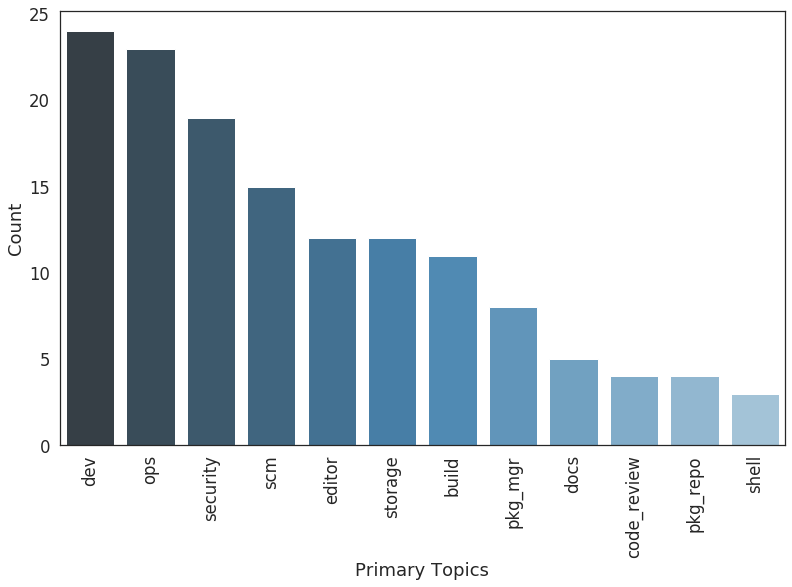

In [45]:
fig = plt.figure(figsize=(13,8))
sns.set(font_scale=1.5)
sns.set_style("white")

plt.xticks(rotation = 90)
order = list(stars_df[stars_df['is_dev']].groupby('topic_primary').count().sort_values('name', ascending=False)['name'].index)
result = sns.countplot(x='topic_primary', data=stars_df[stars_df['is_dev']], palette="Blues_d", order=order)
plt.xlabel("Primary Topics")
plt.ylabel("Count")
#plt.title("Developer Applications", weight="bold")

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')
 

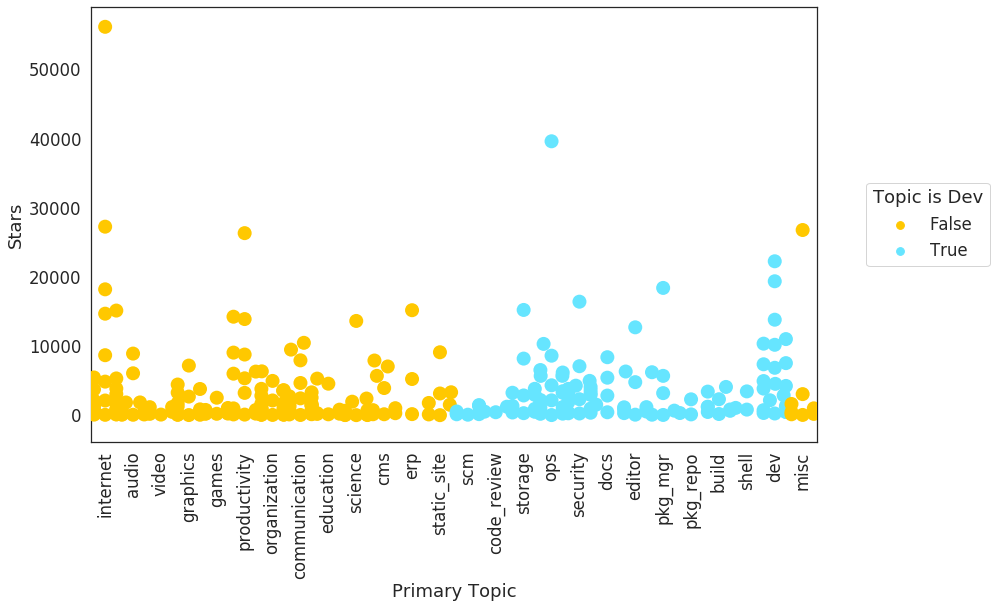

In [46]:
fig = plt.figure(figsize = (13, 8))
plt.xticks(rotation=90)
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="topic_primary", y="gh_stars", hue = "is_dev", data=stars_df)

plt.xlabel("Primary Topic")
plt.ylabel("Stars")
#plt.title("GitHub Stars / Primary Topic", weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
ax.legend(loc='center right', title="Topic is Dev", bbox_to_anchor=(1.25, 0.5), ncol=1)

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')

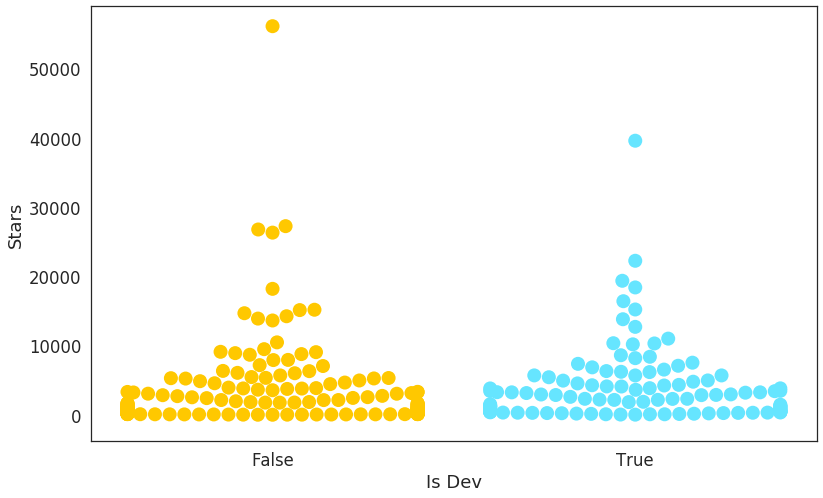

In [47]:
starsdev_df = stars_df.dropna(subset=['is_dev'])
starsdev_df['is_dev'] = starsdev_df['is_dev'].astype(str)

fig = plt.figure(figsize = (13, 8))
#plt.xticks(rotation=90)
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="is_dev", y="gh_stars", data=starsdev_df)

plt.ylabel("Stars")
plt.xlabel("Is Dev")
#plt.title("GitHub Stars / Is Dev", weight='bold')

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')

In [48]:
stars_df[stars_df['gh_stars'] == stars_df['gh_stars'].max()]

,name,arch_compat_min_py2,arch_compat_min_py3,arch_dep_concurrency,arch_dep_gui_framework,arch_dep_server_framework,arch_pkg_container,arch_pkg_freezer,arch_type,gh_forks,gh_has_wiki,gh_license,gh_open_issues,gh_size,gh_stars,gh_watchers,license_hereditary,license_license,license_license_group,sloc_ratio_other,sloc_ratio_autoconf,sloc_ratio_c,sloc_ratio_coffeescript,sloc_ratio_coq,sloc_ratio_cpp,sloc_ratio_css,sloc_ratio_dockerfile,sloc_ratio_go,sloc_ratio_haskell,sloc_ratio_html,sloc_ratio_java,sloc_ratio_javascript,sloc_ratio_jsx,sloc_ratio_less,sloc_ratio_lua,sloc_ratio_markdown,sloc_ratio_meson,sloc_ratio_objectivec,sloc_ratio_python,sloc_ratio_qml,sloc_ratio_restructuredtext,sloc_ratio_rust,sloc_ratio_sass,sloc_ratio_sh,sloc_ratio_sql,sloc_ratio_systemverilog,sloc_ratio_tex,sloc_ratio_typescript,sloc_ratio_vue,sloc_ratio_xml,sloc_ratio_xsl,sloc_ratio_yaml,sloc_total_blanks,sloc_total_code,sloc_total_comments,sloc_total_dirs,sloc_total_files,sloc_total_lines,sloc_actionscript,sloc_asp,sloc_assembly,sloc_autoconf,sloc_automake,sloc_bash,sloc_batch,sloc_c,sloc_c_code,sloc_c_comments,sloc_c_files,sloc_cabal,sloc_cmake,sloc_coffeescript,sloc_coq,sloc_cpp,sloc_cpp_code,sloc_cpp_comments,sloc_cpp_files,sloc_csharp,sloc_cshell,sloc_css,sloc_d,sloc_dockerfile,sloc_dotnetresource,sloc_elisp,sloc_elixir,sloc_fish,sloc_forth,sloc_fortranlegacy,sloc_fortranmodern,sloc_glsl,sloc_go,sloc_graphql,sloc_groovy,...,sloc_html,sloc_java,sloc_javascript,sloc_jsx,sloc_less,sloc_llvm,sloc_lua,sloc_makefile,sloc_markdown,sloc_meson,sloc_moduledef,sloc_msbuild,sloc_mustache,sloc_nix,sloc_objectivec,sloc_objectivecpp,sloc_org,sloc_pascal,sloc_perl,sloc_php,sloc_prolog,sloc_protobuf,sloc_python,sloc_python_code,sloc_python_comments,sloc_python_files,sloc_qml,sloc_r,sloc_rakefile,sloc_restructuredtext,sloc_rpmspecfile,sloc_ruby,sloc_rubyhtml,sloc_rust,sloc_sass,sloc_scala,sloc_scheme,sloc_scons,sloc_sh,sloc_sql,sloc_srecode,sloc_swift,sloc_swig,sloc_systemverilog,sloc_tcl,sloc_tex,sloc_toml,sloc_typescript,sloc_vala,sloc_vb6,sloc_vimscript,sloc_visualstudioproject,sloc_visualstudiosolution,sloc_vue,sloc_xml,sloc_xsl,sloc_yaml,sloc_zsh,topic_primary,topic_primary_fq,topic_secondary,topic_secondary_fq,vcs_commit_count,vcs_committer_count,vcs_committer_percent_dist_10,vcs_committer_percent_dist_100,vcs_committer_percent_dist_20,vcs_committer_percent_dist_30,vcs_committer_percent_dist_40,vcs_committer_percent_dist_50,vcs_committer_percent_dist_60,vcs_committer_percent_dist_70,vcs_committer_percent_dist_80,vcs_committer_percent_dist_90,vcs_committer_percent_dist_95,vcs_committer_percent_dist_99,vcs_committer_top_5_0,vcs_committer_top_5_1,vcs_committer_top_5_2,vcs_committer_top_5_3,vcs_committer_top_5_4,vcs_first_commit,vcs_latest_commit,vcs_minor_committer_counts_1,vcs_minor_committer_counts_2,vcs_minor_committer_counts_3,vcs_minor_committer_counts_4,vcs_minor_committer_counts_5,vcs_vcs_name,py23_compat,age_commit,py3_compat,is_dev
28,youtube_dl,2.7,NaN,NaN,NaN,NaN,NaN,py2exe,desktop,9740.0,False,The Unlicense,3054.0,56638.0,56117.0,1792.0,True,Unlicense,Unlicense,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16751.0,129280.0,4259.0,94.0,1050.0,150290.0,265.0,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,3042.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146153.0,125381.0,4170.0,870.0,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,internet,internet,NaN,NaN,17285.0,798.0,1.0,798.0,1.0,1.0,2.0,No,3.0,4.0,5.0,23.0,153.0,626.0,0.36,0.2194,0.0851,0.0815,0.0803,2008-07-21,2019-10-01,474.0,599.0,655.0,690.0,714.0,git,py2,4089.0,False,False


In [49]:
apa_df.sloc_total_lines.quantile([0.25,0.5,0.75])

0.25     23744.0
0.50     63438.0
0.75    158077.0
Name: sloc_total_lines, dtype: float64

In [50]:
def lines_size(x):
    if x <= 30501.0:
        return "Small"
    if x >= 168724.0:
        return "Large"
    return "Medium"

apa_df['size_total_lines'] = apa_df['sloc_total_lines'].apply(lines_size)

Text(0, 0.5, 'Count')

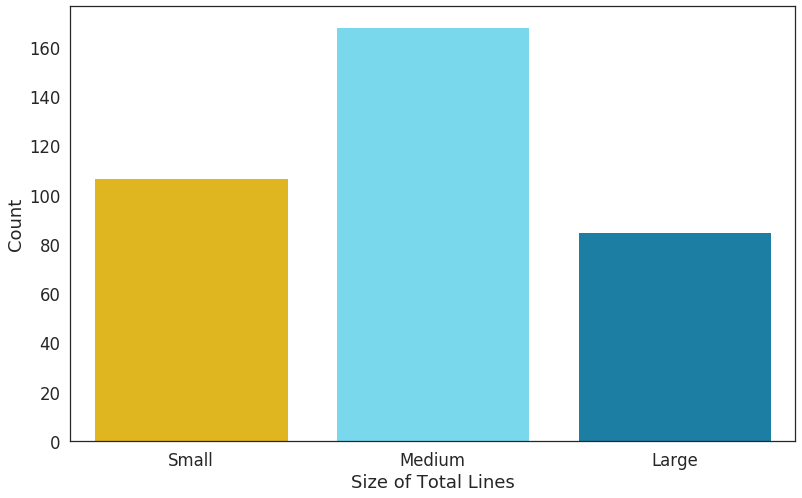

In [51]:
fig = plt.figure(figsize=(13,8))
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.countplot(x='size_total_lines',data=apa_df, palette=PALETTE, order=['Small', 'Medium', 'Large'])

plt.xlabel("Size of Total Lines")
plt.ylabel("Count")
#plt.title("Size of Total Lines", weight='bold')

#fig.set_facecolor('#45AFDC00')
#ax.set_facecolor('#00000000')

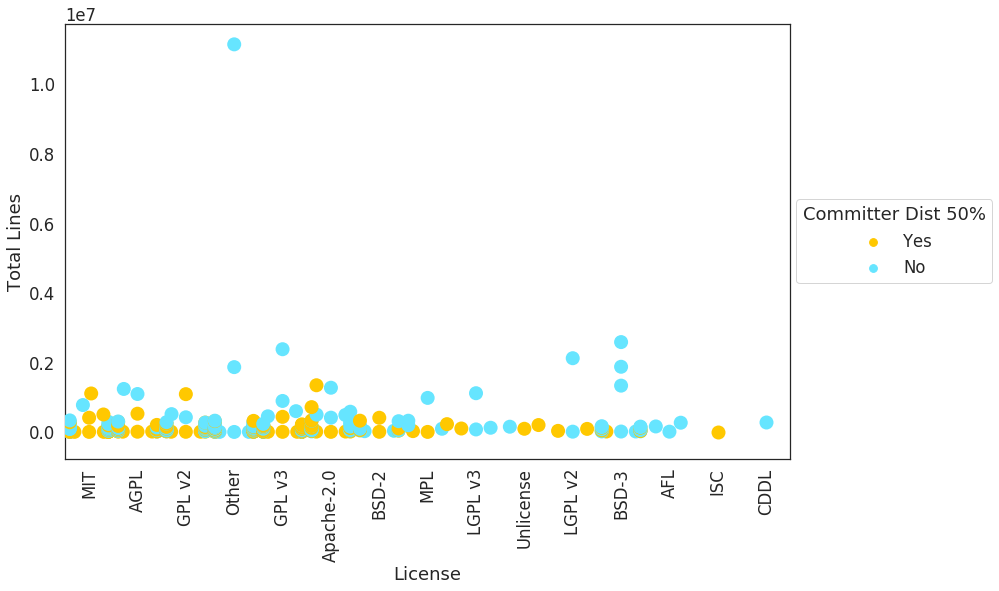

In [52]:
fig = plt.figure(figsize = (13, 8))
plt.xticks(rotation=90)
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="license_license", y="sloc_total_lines", hue = 'vcs_committer_percent_dist_50', data=apa_df)

plt.xlabel("License")
plt.ylabel("Total Lines")
#plt.title("Total Lines / License", weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
ax.legend(loc='center right', title="Committer Dist 50%", bbox_to_anchor=(1.29, 0.5), ncol=1)

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')

In [53]:
apa_df[apa_df['sloc_total_lines'] == apa_df['sloc_total_lines'].max()]

,name,arch_compat_min_py2,arch_compat_min_py3,arch_dep_concurrency,arch_dep_gui_framework,arch_dep_server_framework,arch_pkg_container,arch_pkg_freezer,arch_type,gh_forks,gh_has_wiki,gh_license,gh_open_issues,gh_size,gh_stars,gh_watchers,license_hereditary,license_license,license_license_group,sloc_ratio_other,sloc_ratio_autoconf,sloc_ratio_c,sloc_ratio_coffeescript,sloc_ratio_coq,sloc_ratio_cpp,sloc_ratio_css,sloc_ratio_dockerfile,sloc_ratio_go,sloc_ratio_haskell,sloc_ratio_html,sloc_ratio_java,sloc_ratio_javascript,sloc_ratio_jsx,sloc_ratio_less,sloc_ratio_lua,sloc_ratio_markdown,sloc_ratio_meson,sloc_ratio_objectivec,sloc_ratio_python,sloc_ratio_qml,sloc_ratio_restructuredtext,sloc_ratio_rust,sloc_ratio_sass,sloc_ratio_sh,sloc_ratio_sql,sloc_ratio_systemverilog,sloc_ratio_tex,sloc_ratio_typescript,sloc_ratio_vue,sloc_ratio_xml,sloc_ratio_xsl,sloc_ratio_yaml,sloc_total_blanks,sloc_total_code,sloc_total_comments,sloc_total_dirs,sloc_total_files,sloc_total_lines,sloc_actionscript,sloc_asp,sloc_assembly,sloc_autoconf,sloc_automake,sloc_bash,sloc_batch,sloc_c,sloc_c_code,sloc_c_comments,sloc_c_files,sloc_cabal,sloc_cmake,sloc_coffeescript,sloc_coq,sloc_cpp,sloc_cpp_code,sloc_cpp_comments,sloc_cpp_files,sloc_csharp,sloc_cshell,sloc_css,sloc_d,sloc_dockerfile,sloc_dotnetresource,sloc_elisp,sloc_elixir,sloc_fish,sloc_forth,sloc_fortranlegacy,sloc_fortranmodern,sloc_glsl,sloc_go,sloc_graphql,sloc_groovy,...,sloc_html,sloc_java,sloc_javascript,sloc_jsx,sloc_less,sloc_llvm,sloc_lua,sloc_makefile,sloc_markdown,sloc_meson,sloc_moduledef,sloc_msbuild,sloc_mustache,sloc_nix,sloc_objectivec,sloc_objectivecpp,sloc_org,sloc_pascal,sloc_perl,sloc_php,sloc_prolog,sloc_protobuf,sloc_python,sloc_python_code,sloc_python_comments,sloc_python_files,sloc_qml,sloc_r,sloc_rakefile,sloc_restructuredtext,sloc_rpmspecfile,sloc_ruby,sloc_rubyhtml,sloc_rust,sloc_sass,sloc_scala,sloc_scheme,sloc_scons,sloc_sh,sloc_sql,sloc_srecode,sloc_swift,sloc_swig,sloc_systemverilog,sloc_tcl,sloc_tex,sloc_toml,sloc_typescript,sloc_vala,sloc_vb6,sloc_vimscript,sloc_visualstudioproject,sloc_visualstudiosolution,sloc_vue,sloc_xml,sloc_xsl,sloc_yaml,sloc_zsh,topic_primary,topic_primary_fq,topic_secondary,topic_secondary_fq,vcs_commit_count,vcs_committer_count,vcs_committer_percent_dist_10,vcs_committer_percent_dist_100,vcs_committer_percent_dist_20,vcs_committer_percent_dist_30,vcs_committer_percent_dist_40,vcs_committer_percent_dist_50,vcs_committer_percent_dist_60,vcs_committer_percent_dist_70,vcs_committer_percent_dist_80,vcs_committer_percent_dist_90,vcs_committer_percent_dist_95,vcs_committer_percent_dist_99,vcs_committer_top_5_0,vcs_committer_top_5_1,vcs_committer_top_5_2,vcs_committer_top_5_3,vcs_committer_top_5_4,vcs_first_commit,vcs_latest_commit,vcs_minor_committer_counts_1,vcs_minor_committer_counts_2,vcs_minor_committer_counts_3,vcs_minor_committer_counts_4,vcs_minor_committer_counts_5,vcs_vcs_name,py23_compat,age_commit,py3_compat,size_total_lines
196,erp5,2.7,NaN,NaN,NaN,zope,NaN,NaN,server,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74,NaN,NaN,295050.0,10564060.0,276967.0,13636.0,83711.0,11136077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70382.0,NaN,1772457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7164.0,NaN,NaN,582501.0,431025.0,83743.0,5627.0,NaN,NaN,NaN,968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.0,10460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489.0,NaN,NaN,NaN,NaN,NaN,NaN,8289791.0,50.0,NaN,NaN,erp,erp,NaN,NaN,50620.0,100.0,1.0,100.0,2.0,3.0,5.0,No,10.0,12.0,16.0,23.0,31.0,50.0,0.1639,0.0761,0.0617,0.0595,0.0592,2002-12-10,2019-10-02,9.0,14.0,18.0,20.0,22.0,git,py2,6140.0,False,Large


Text(0, 0.5, '')

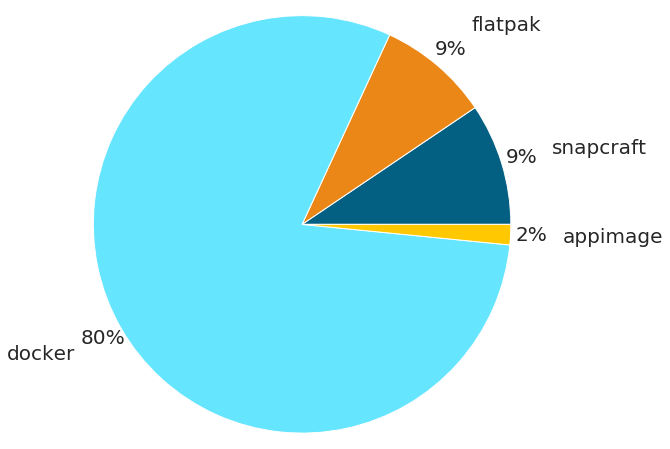

In [54]:
pie = m_pieplot(
    apa_df
    .groupby('arch_pkg_container')
    .count()
    .sort_values('arch_pkg_container', ascending=False))
plt.ylabel("")
#plt.title("Container Technology Breakdown", weight='bold', pad = 40, size=20)

Text(0, 0.5, 'Container Technology')

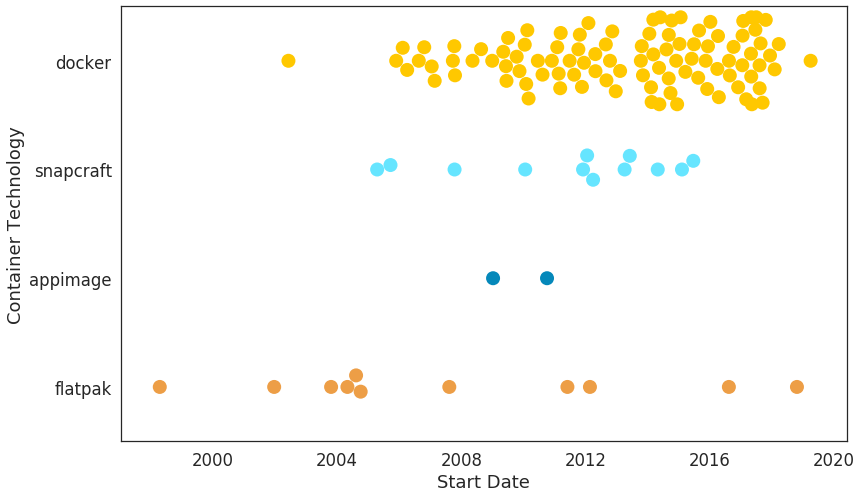

In [55]:
containerpkg_df = apa_df.dropna(subset=['arch_pkg_container'])
containerpkg_df = containerpkg_df.dropna(subset=['vcs_first_commit'])

fig = plt.figure(figsize = (13, 8))
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="vcs_first_commit", y="arch_pkg_container", data=containerpkg_df)

plt.xlabel("Start Date")
plt.ylabel("Container Technology")
#plt.title("Start Date / Container Technology", weight='bold')

Text(0, 0.5, '')

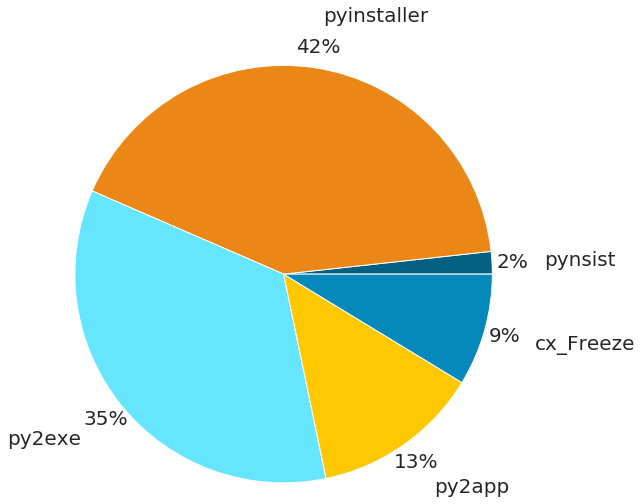

In [56]:
pie = m_pieplot(
    apa_df
    .groupby('arch_pkg_freezer')
    .count()
    .sort_values('arch_pkg_freezer', ascending=False))
plt.ylabel("")
#plt.title("Freezer Technology Breakdown", weight='bold', pad = 40, size=20)


Text(0, 0.5, 'Freezer Technology')

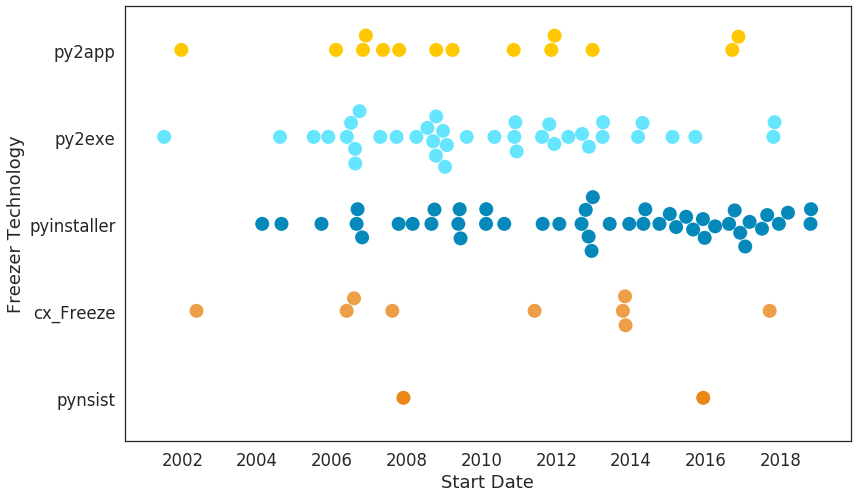

In [57]:
freezerpkg_df = apa_df.dropna(subset=['arch_pkg_freezer'])
freezerpkg_df = freezerpkg_df.dropna(subset=['vcs_first_commit'])

fig = plt.figure(figsize = (13, 8))
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="vcs_first_commit", y="arch_pkg_freezer", data=freezerpkg_df)

plt.xlabel("Start Date")
plt.ylabel("Freezer Technology")
#plt.title("Start Date / Freezer Technology", weight='bold')

Text(0, 0.5, '')

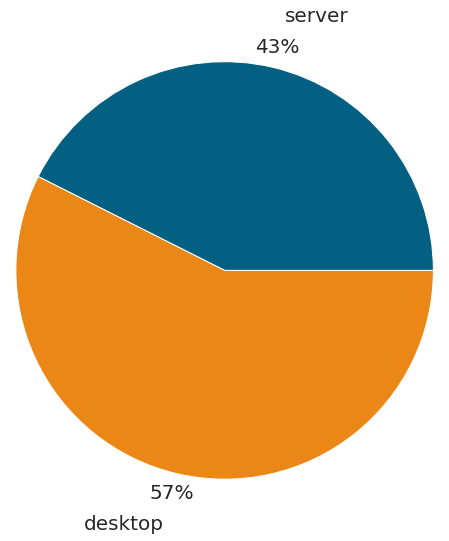

In [58]:
pie = m_pieplot(
    apa_df
    .groupby('arch_type')
    .count()
    .sort_values('arch_type', ascending=False))

#plt.title("Desktop vs Server Breakdown", weight='bold', pad=40, size=20)
plt.ylabel("")

Text(0, 0.5, 'Arch Type')

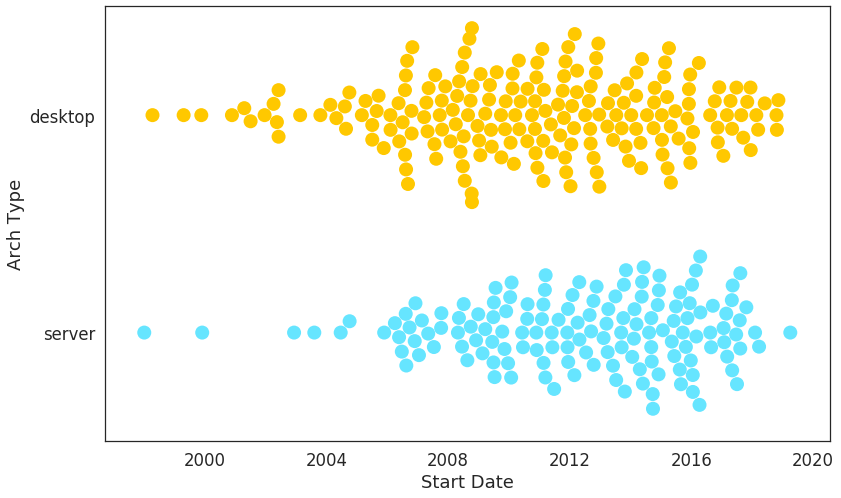

In [59]:
arch_df = apa_df.dropna(subset=['arch_type'])
arch_df = arch_df.dropna(subset=['vcs_first_commit'])

fig = plt.figure(figsize = (13, 8))
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="vcs_first_commit", y="arch_type", data=arch_df)

plt.xlabel("Start Date")
plt.ylabel("Arch Type")
#plt.title("Start Date / Arch Type", weight='bold')

In [60]:
py3_df = apa_df.dropna(subset=['arch_compat_min_py3'])

In [61]:
def py_3(x):
    if x <= 3.4:
        return "<3.5+"
    return '%s+' % x

py3_df['py3_type'] = py3_df['arch_compat_min_py3'].apply(py_3)

/home/mayoubi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, '')

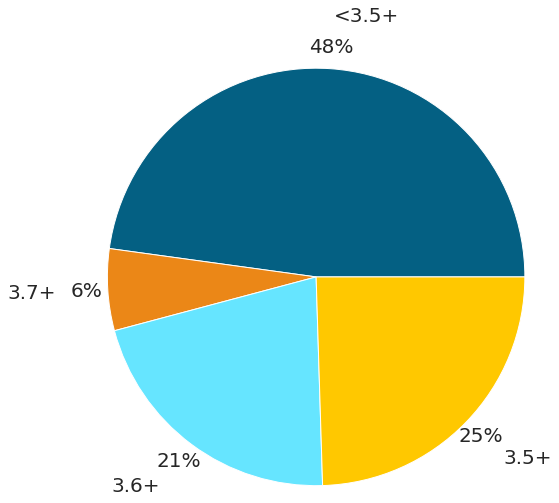

In [62]:
pie = m_pieplot(
    py3_df
    .groupby('py3_type')
    .count()
    .sort_values('py3_type', ascending=False))
#plt.title("Python 3 Breakdown", weight='bold', pad = 40, size=20)
plt.ylabel("")